<a href="https://colab.research.google.com/github/MasoudMoeini/Google-Street-View-Images-Blur-Detection/blob/main/images_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part1.zip

--2022-10-16 18:24:59--  http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part1.zip
Resolving www.cs.ucf.edu (www.cs.ucf.edu)... 132.170.216.243
Connecting to www.cs.ucf.edu (www.cs.ucf.edu)|132.170.216.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4902098439 (4.6G) [application/zip]
Saving to: ‘part1.zip’

part1.zip           100%[===================>]   4.57G  12.6MB/s    in 6m 34s  

2022-10-16 18:31:33 (11.9 MB/s) - ‘part1.zip’ saved [4902098439/4902098439]



In [ ]:
!unzip -q part1.zip -d  part1

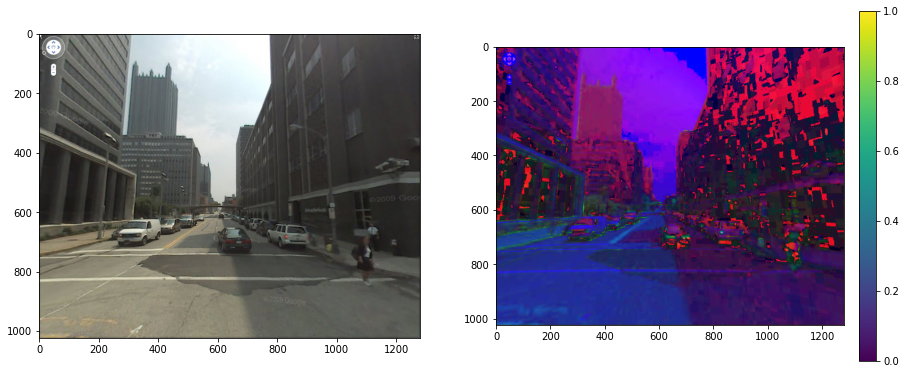

In [ ]:
from PIL import Image, ImageFilter
import glob
import os
import numpy as np
import cv2
from random import *
import shutil
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
image_path='part1/'
image =Image.open(image_path+'000002_4.jpg')
img = cv2.imread(image_path+'000002_4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img)
# Converting RGB Image to HSV Image
hsv_img = rgb2hsv(img)
plt.subplot(1, 2, 2) 
# Displaying the sample image - HSV Format
hsv_img_colorbar = plt.imshow(hsv_img)
 
# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_img_colorbar, fraction=0.046, pad=0.04)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


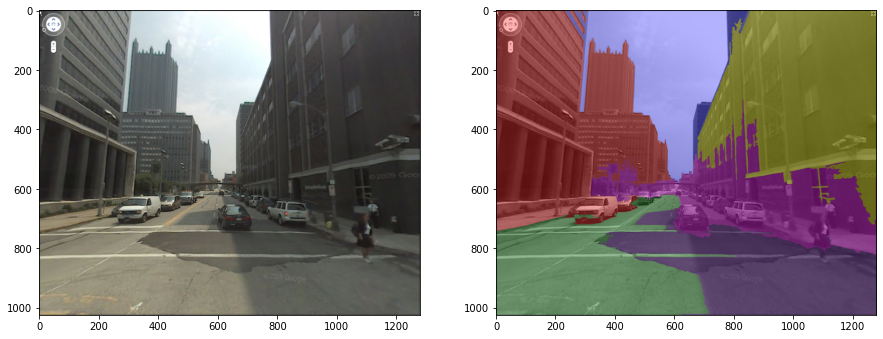

In [51]:
# Importing required libraries
from skimage.segmentation import slic
from skimage.data import astronaut
from skimage.color import label2rgb

# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))
image_path='part1/'
image =Image.open(image_path+'000002_4.jpg')
img = cv2.imread(image_path+'000002_4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
image_segments = slic(img,n_segments=6,compactness=10)
plt.subplot(1,2,1)
# Plotting the original image
plt.imshow(img)
plt.subplot(1,2,2)

# Converts a label image into
# an RGB color image for visualizing
# the labeled regions.
plt.imshow(label2rgb(image_segments,img))
segmented_img=label2rgb(image_segments,img)
#cv2.imwrite('gg.jpg',segmented_img)
def write_image(path, img):
    img = cv2.convertScaleAbs(img, alpha=(255.0))
    cv2.imwrite(path, img)
write_image('gg.jpg',segmented_img)

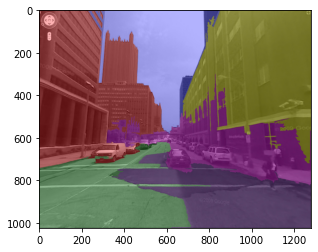

In [52]:
imgt = cv2.imread('gg.jpg')
plt.imshow(imgt)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
h, s, v = cv2.split(label2rgb(image_segments,img))
fig = plt.figure(figsize=(20,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

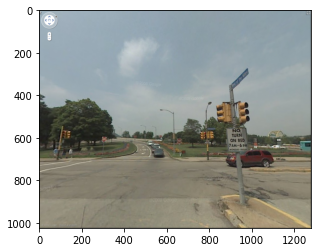

In [ ]:
img = cv2.imread(image_path+'000002_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

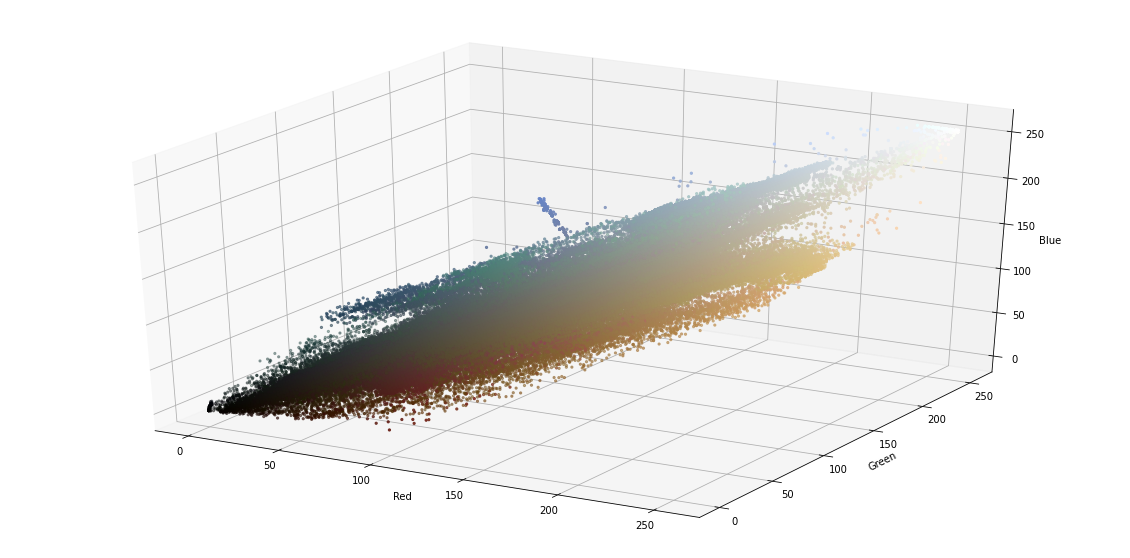

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
r, g, b = cv2.split(img)
fig = plt.figure(figsize=(20,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

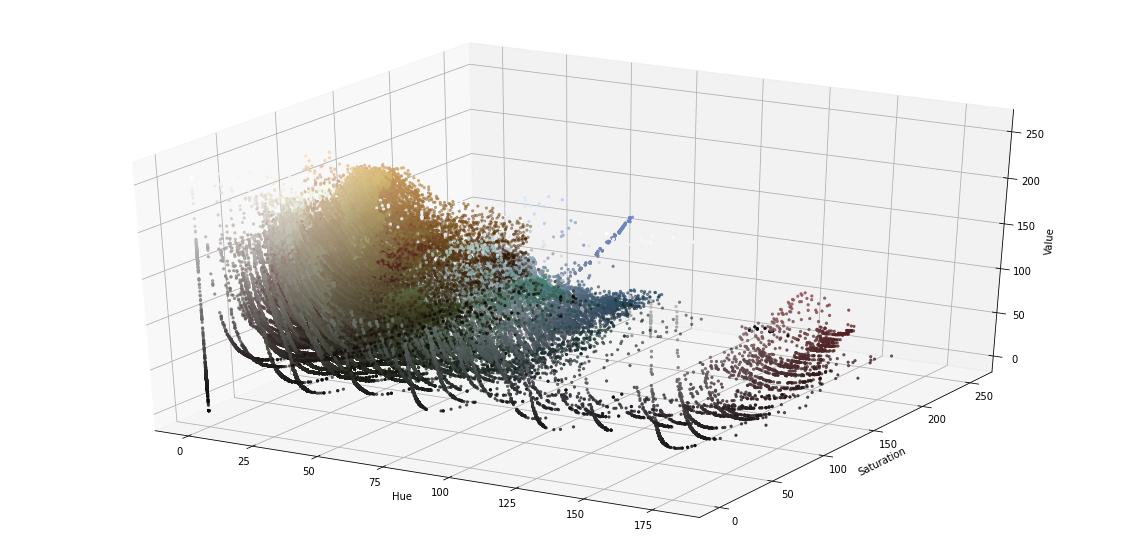

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
fig = plt.figure(figsize=(20,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

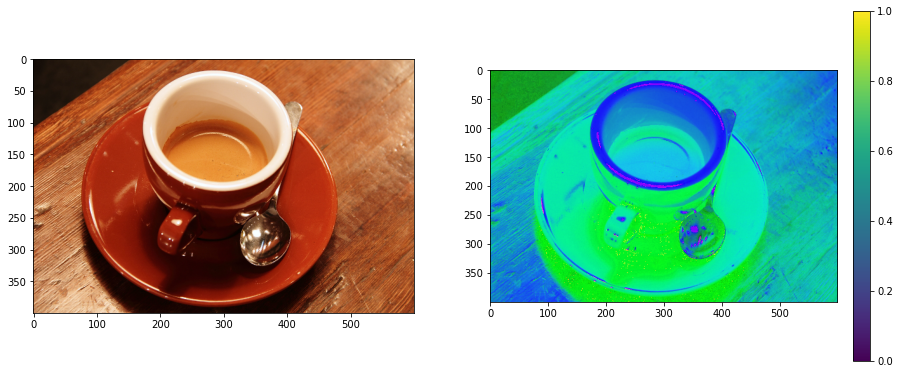

In [ ]:
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
 
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
# Sample Image of scikit-image package
coffee = data.coffee()
plt.subplot(1, 2, 1)
 
# Displaying the sample image
plt.imshow(coffee)
 
# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(coffee)
plt.subplot(1, 2, 2)
 
# Displaying the sample image - HSV Format
hsv_coffee_colorbar = plt.imshow(hsv_coffee)
 
# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04)